In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
N = 50
std = 0.4

Apple_width = np.random.normal(6, std, N)
Apple_length = np.random.normal(6, std, N)

Benanas_width = np.random.normal(4, std, N)
Benanas_length = np.random.normal(8, std, N)

In [25]:
width = np.concatenate((Apple_width, Benanas_width))
length = np.concatenate((Apple_length, Benanas_length))

In [26]:
X = np.array([width, length]).T
Apple_lable = np.zeros(N, dtype = 'int') 
Benanas_lable = np.ones(N, dtype = 'int')

In [27]:
Y = np.concatenate((Apple_lable,Benanas_lable))

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
#print(Y_train)
print(X_test)

[[3.72983101 8.23413227]
 [4.50741875 8.40267864]
 [4.77107623 7.90313407]
 [4.22050769 7.83451653]
 [3.80056952 8.09573431]
 [3.97592766 7.95052884]
 [6.70816339 5.510677  ]
 [6.27555456 6.09405925]
 [4.08938045 8.3882441 ]
 [6.20642791 5.93149542]
 [6.19431919 6.39414376]
 [5.66646271 6.0075206 ]
 [5.7966435  6.10809856]
 [3.23858466 7.74686488]
 [4.56317139 8.0977106 ]
 [5.5682716  5.80768511]
 [6.07506815 5.79903525]
 [3.65017186 8.38258753]
 [5.61687949 6.39775528]
 [6.5587023  5.29164829]
 [5.54639889 5.91156282]
 [5.50055797 6.22955902]
 [6.14331964 6.81381551]
 [3.9730837  8.17195642]
 [4.33122643 8.22250988]]


In [29]:
print("whole dataset:", X.shape, Y.shape)
print("training set:", X_train.shape,Y_train.shape)
print("test set:", X_test.shape, Y_test.shape)

whole dataset: (100, 2) (100,)
training set: (75, 2) (75,)
test set: (25, 2) (25,)


Text(0, 0.5, 'Length')

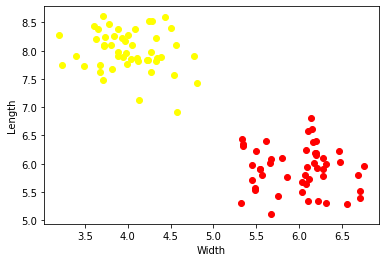

In [30]:
fig = plt.figure()
plt.scatter(X[0:N , 0] , X[0:N , 1] ,  c = 'RED')
plt.scatter(X[N: ,0] , X[N: ,1]  , c = 'yellow')
plt.xlabel('Width')
plt.ylabel('Length')

In [31]:
class kNearestNeighbors(): 


    def __init__(self, k):
        self.k = k 


    def fit(self, X_train , Y_train): 
        self.X_train = X_train
        self.Y_train = Y_train
        self.number_classes = len(np.unique(Y_train))


    def nearNeighbors(self , X_test):
        dist = np.sqrt(np.sum((X_test - self.X_train)**2 ,axis=1))
        near_neighbors = np.argsort(dist)[:self.k]
        print(near_neighbors)
        print(self.Y_train[near_neighbors])
        print(np.bincount(self.Y_train[near_neighbors]))
        return near_neighbors

        
    def predict (self, X_test):
        near_neighbors = self.nearNeighbors(X_test)
        y = np.argmax(np.bincount(self.Y_train[near_neighbors]))
        return y

    def Evaluate (self, y_pred):
        if y-pred = Y


In [32]:
knn = kNearestNeighbors(k=5)
knn.fit(X,Y)

In [45]:
print(X_test.shape)
print(X_test)

(25, 2)
[[3.72983101 8.23413227]
 [4.50741875 8.40267864]
 [4.77107623 7.90313407]
 [4.22050769 7.83451653]
 [3.80056952 8.09573431]
 [3.97592766 7.95052884]
 [6.70816339 5.510677  ]
 [6.27555456 6.09405925]
 [4.08938045 8.3882441 ]
 [6.20642791 5.93149542]
 [6.19431919 6.39414376]
 [5.66646271 6.0075206 ]
 [5.7966435  6.10809856]
 [3.23858466 7.74686488]
 [4.56317139 8.0977106 ]
 [5.5682716  5.80768511]
 [6.07506815 5.79903525]
 [3.65017186 8.38258753]
 [5.61687949 6.39775528]
 [6.5587023  5.29164829]
 [5.54639889 5.91156282]
 [5.50055797 6.22955902]
 [6.14331964 6.81381551]
 [3.9730837  8.17195642]
 [4.33122643 8.22250988]]


In [41]:
X_train.shape

(75, 2)

In [50]:
for i in range (len(X_test)):
    y_pred = knn.predict(X_test[i])
    print(y_pred)

[61 95 93 70 76]
[1 1 1 1 1]
[0 5]
1
[50 65 87 62 58]
[1 1 1 1 1]
[0 5]
1
[72 96 99 66 82]
[1 1 1 1 1]
[0 5]
1
[52 71 81 75 94]
[1 1 1 1 1]
[0 5]
1
[76 70 98 97 61]
[1 1 1 1 1]
[0 5]
1
[83 79 97 59 85]
[1 1 1 1 1]
[0 5]
1
[28 32  2 31  5]
[0 0 0 0 0]
[5]
0
[41  8  1 13 11]
[0 0 0 0 0]
[5]
0
[53 63 84 58 69]
[1 1 1 1 1]
[0 5]
1
[ 6 38 11 43  1]
[0 0 0 0 0]
[5]
0
[23 39 33 21 34]
[0 0 0 0 0]
[5]
0
[47 42  9  7 48]
[0 0 0 0 0]
[5]
0
[48 42 47 33  9]
[0 0 0 0 0]
[5]
0
[51 92 56 60 74]
[1 1 1 1 1]
[0 5]
1
[96 62 99 72 50]
[1 1 1 1 1]
[0 5]
1
[25  7  9 30 26]
[0 0 0 0 0]
[5]
0
[16 12 37 43 15]
[0 0 0 0 0]
[5]
0
[68 57 55 61 95]
[1 1 1 1 1]
[0 5]
1
[ 4 10 44 49 18]
[0 0 0 0 0]
[5]
0
[ 2 32  5 28 35]
[0 0 0 0 0]
[5]
0
[ 9  7 25 26 47]
[0 0 0 0 0]
[5]
0
[10 44 49  4 42]
[0 0 0 0 0]
[5]
0
[46 14 34 23 39]
[0 0 0 0 0]
[5]
0
[80 69 64 63 93]
[1 1 1 1 1]
[0 5]
1
[62 67 50 96 53]
[1 1 1 1 1]
[0 5]
1


In [44]:
new_fruit = np.array([4.7 , 6.8])
y_pred = knn.predict(new_fruit)
friut = { 0 : 'موز' , 
          1: 'سیب'}
print(friut[y_pred])
        

[77 78 86 18 49]
[1 1 1 0 0]
[2 3]
سیب
